今までは、6/46、
教師データ：ダウンサイズ→行列削除→正方行列化→正規化→平滑化→階調方向正規化
入力データ：グレースケール化→背景を255→行列削除→正方行列化→外周追加→正規化→
　　　　　　　→平滑化→階調方向正規化


階調方向に正規化

教師データに外周追加
いらない行、列を削除しない→正方行列化しなくてOK

入力画像にも外周追加
#----------------------------
一種文字あたり22種類のフォント、40〜6のまで35種類をｄｓ、一文字あたり770枚の画像、
770*46=35420
20000:15420

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image, ImageFilter
import cv2
import numpy as np
import sys
import numpy
import PIL.Image
import PIL.ImageDraw
import PIL.ImageFont
from PIL import Image, ImageDraw, ImageFont
import os
import glob
from matplotlib.font_manager import FontProperties
fp = FontProperties(fname=r'/usr/share/fonts/truetype/takao-gothic/TakaoPGothic.ttf', size=14)


In [1]:
path= 'img/font_hiragana/'
hiragana_lis=os.listdir(path)
#hiragana_lis.remove('.png')

n=0
for i in hiragana_lis:
    print(n,hiragana_lis[n])
    n+=1
    

#-------------- 実験場↓---------------------    

target= hiragana_lis[0]# -----------------文字種選択
path1= path+target+'/'
#print(path1)
img_lis= os.listdir( path1 )


test_img= cv2.imread(path1+img_lis[2])# フォント指定
#test_img= cv2.imread(path1+img_lis[0],0)# フォント指定
#test_img= cv2.cvtColor( test_img, cv2.COLOR_BGR2RGB )
test_img = cv2.cvtColor(test_img, cv2.COLOR_BGR2GRAY)
#test_img = cv2.cvtColor(test_img, 0)
print("test_img=",test_img.shape)


plt.figure( figsize=(3,3) )
plt.gray()
plt.title("test_img")
#imshowは「BGRフォーマットを引数」にとり、「カラーで表示」させるためのもの,これだけでは白黒にはならない
plt.imshow(test_img)


test_dir= "img/test/"
file_name= 1
for i in range(40,5,-1):# ダウンサイズ指定
    plt.figure(figsize=(10,10) )
    
    plt.subplot( 151 )
    test_ds_img= cv2.resize(test_img,(i,i) )# ダウンサイズ実行
    plt.title(i)
    plt.imshow(test_ds_img)
    #if w==8:
     #   cv2.imwrite( test_dir+str(file_name)+".jpg",test_ds_img )
    
    #---------------------------いらない行、列を削除
    test_ds_img= test_ds_img[:, ~np.all(test_ds_img==255, axis=0)]# ok
    test_ds_img= test_ds_img.T
    test_ds_img= test_ds_img[:, ~np.all(test_ds_img==255, axis=0)]# ok
    test_ds_img= test_ds_img.T
    plt.subplot( 142 )
    plt.imshow( test_ds_img )
    #print(test_ds_img)
    
    #---------------------------------------正方行列化
    h,w= test_ds_img.shape
    print("h,w=" ,h,w)
    for i in range( abs(h-w) ):
        if h>w:
            test_ds_img= np.insert( test_ds_img,w,255, axis=1)
        elif w>h:
            test_ds_img= np.insert( test_ds_img,h,255, axis=0 )
    
    
    kernel = np.ones((5,5),np.float32)/25
   
    
    test_ds_img= cv2.resize(test_ds_img,(40,40) )# 正規化サイズ指定
    plt.subplot( 153 )
    plt.imshow( test_ds_img )
    
    test_ds_img = cv2.filter2D(test_ds_img,-1,kernel)# 平滑化
    plt.subplot( 154 )
    plt.imshow( test_ds_img )
    print("min4=",np.amin(test_ds_img) )
    
    # 階調方向に正規化
    test_ds_img= cv2.normalize( test_ds_img,test_ds_img,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX )
    plt.subplot( 155 )
    plt.imshow( test_ds_img )
    print("min4=",np.amin(test_ds_img) )
    
    print("min5=",np.amin(test_ds_img) )
    
    #if w==10:
     #   print("min=",np.amin(test_ds_img) )
      #  cv2.imwrite( test_dir+str(file_name)+".jpg",test_ds_img )
    #file_name+=1
    
#test_ds_img= cv2.resize(test_ds_img,(50,50) )# 正規化サイズ指定
#plt.figure(figsize=(3,3) )
#plt.imshow(test_ds_img)


#-------------- 実験場↑---------------------


Z=0
for i in hiragana_lis:
    path1= path+i
    target_lis= os.listdir(path1)
    new_dir= "img/ds_hiragana/"+i
    os.makedirs( new_dir, exist_ok=True )
    name_num1= 0
    for n in target_lis:
        print('読み込み先：',path1+'/'+n)
        img= cv2.imread( path1+"/"+n )
        img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        name_num2= 0
        for a in range( 40,5,-1 ):
            img= cv2.resize(img,(a,a) )# down size
            
            
            #---------------------------いらない行、列を削除
            #img= img[:, ~np.all( img==255, axis=0)]# ok
            #img= img.T
            #img= img[:, ~np.all( img==255, axis=0)]# ok
            #img= img.T
            
#            #---------------------------------------正方行列化
 #           h,w= img.shape
　　　　　　　#for i in range( abs(h-w) ):
              #  if h>w:
               #     img= np.insert( img,w,255, axis=1)
  #               elif w>h:
   #                     img= np.insert( img,h,255, axis=0 )
            
            
            kernel = np.ones((5,5),np.float32)/25
            img= cv2.resize(img,(40,40) )# ------------------正規化サイズ指定
            img = cv2.filter2D(img,-1,kernel)# ----------------------平滑化
            img= cv2.normalize( img,img,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX )
            
            
            file_name= i+str(name_num1)+'-'+str(name_num2)+'.jpg'
            #print( 'file_name=',file_name )
            destination_name= 'img/ds_hiragana/'+i+'/'+file_name
            #print( '保存先：', destination_name )
            cv2.imwrite( destination_name, img )
            name_num2+=1
            
            
            if Z%100==0:
                plt.figure(figsize=(5,5) )
                plt.title(destination_name,fontproperties=fp)
                plt.imshow(img)
            Z+=1
        name_num1+=1


NameError: name 'os' is not defined

In [ ]:
import glob
import cv2

target_dir= 'img/cliped_img2/へ/*'# 文字種選択
cliped_img_list= glob.glob(target_dir)
print(cliped_img_list)

img= cv2.imread(cliped_img_list[0] )# 使用写真変更
#img= cv2.cvtColor( img, cv2.COLOR_BGR2RGB )
plt.figure(figsize=(5,5))
plt.title("original img")
plt.imshow(img)

print(img.shape)

plt.figure(figsize=(15,15) )
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)#--------------<convert to gray>
#gray = cv2.cvtColor(img, 0)    
plt.gray()
plt.subplot(321)
plt.title("gray img")
plt.imshow(gray)
cv2.imwrite('img/gray.jpg',gray)

h,w= gray.shape
print( 'h,w=',h,w )

#------------------外周のガゾの最小値以上の画素値を全て255にする
edg_lis= gray[0].flatten().tolist()
edg_lis.extend(gray[:,0:1].flatten().tolist() )
edg_lis.extend(gray[h-1:h,:].flatten().tolist() )
edg_lis.extend(gray[:,w-1:w].flatten().tolist() )
print(edg_lis)
min_edg= min(edg_lis)-5
print('min_edg=',min_edg)
gray[gray>=min_edg]=255#  (255-min_edg)を全体に足す？

plt.subplot(322)
plt.imshow(gray)
plt.title("removed background")
cv2.imwrite('img/gray2.jpg',gray)
print(gray)

#---------------------------いらない行、列を削除
#print('gray=',gray)
gray= gray[:, ~np.all(gray==255, axis=0)]# ok
#print('gray=',gray)
gray= gray.T
gray= gray[:, ~np.all(gray==255, axis=0)]# ok
gray= gray.T

plt.subplot(323)
plt.imshow(gray)
plt.title("remove row and column all 255")
cv2.imwrite('img/gray2.jpg',gray)
print(gray)
#--------------------------正方行列にする
h,w= gray.shape
print( 'h,w=',h,w )
for i in range( abs(h-w) ):
    if h>w:
        gray= np.insert( gray,w,255, axis=1)
    elif w>h:
        gray= np.insert( gray,h,255, axis=0 )
#new = np.delete(data, 0, 1)
        
plt.subplot(324)
plt.title("reshape to square matrix")
plt.imshow(gray)
cv2.imwrite('img/gray3.jpg',gray)


# ------------------------------外周に一列づつ足す
h,w= gray.shape
gray= np.insert( gray,0,255,axis=1 )
gray= np.insert( gray,0,255,axis=0 )
gray= np.insert( gray,h+1,255,axis=1 )
gray= np.insert( gray,w+1,255,axis=0 )

plt.subplot(325)
plt.title("add to square matrix")
plt.imshow(gray)
cv2.imwrite('img/gray4.jpg',gray)

#--------------------------------------------正規化
#    cv2.INTER_NEAREST 最近傍補間
#    cv2.INTER_LINEAR バイリニア補間（デフォルト）
#    cv2.INTER_AREA 平均画素法
#    cv2.INTER_CUBIC 4×4 の近傍領域を利用するバイキュービック補間
#    cv2.INTER_LANCZOS4 8×8 の近傍領域を利用する Lanczos法の補間
gray= cv2.resize( gray, (40,40) )# ------------------------------正規化サイズ

# ----------- 階調方向に正規化
gray= cv2.normalize( gray,gray,alpha=0,beta=255,norm_type=cv2.NORM_MINMAX )
print("gray5=",gray)

#二値化
ret, gray = cv2.threshold(gray, 110, 255, cv2.THRESH_BINARY)

plt.subplot(326)
plt.title("normalize size")
plt.imshow(gray)
cv2.imwrite('img/gray5.jpg',gray)


# 教師データとかなり乖離しているが、これでよそくできるのか？
# 教師データが薄いので、入力画像を薄くする？
# 外周の一番低い値分全体に足す？

# cilabに画像で渡すと、なぜか値が変わる→　flattenしてnpとして渡す
flat= gray.flatten()
print("flat= ",flat)
np.save("flat_input.npy",flat)

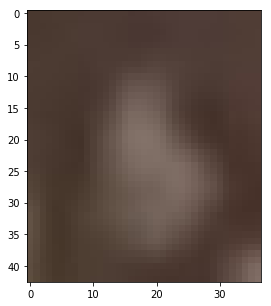

In [8]:
import cv2

img= cv2.imread("IMG_2167 (1).jpg")
plt.figure(figsize=(5,5))
plt.imshow(img)
plt.show()

へ
['IMG_2312 (27).jpg']
img/cliped_img2/へ/IMG_2312 (27).jpg


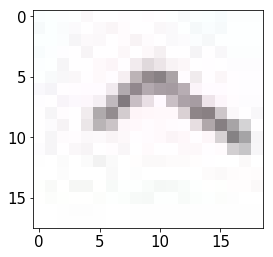

ま
['IMG_2312 (29).jpg']
img/cliped_img2/ま/IMG_2312 (29).jpg


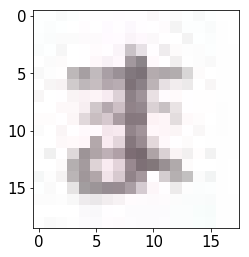

て
['IMG_2312 (17).jpg']
img/cliped_img2/て/IMG_2312 (17).jpg


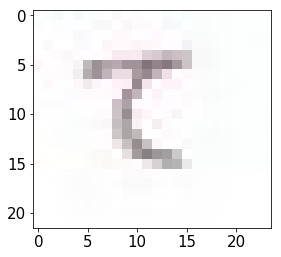

つ
['IMG_2312 (16).jpg']
img/cliped_img2/つ/IMG_2312 (16).jpg


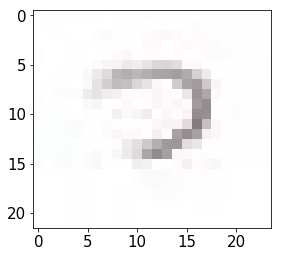

き
['IMG_2312 (4).jpg']
img/cliped_img2/き/IMG_2312 (4).jpg


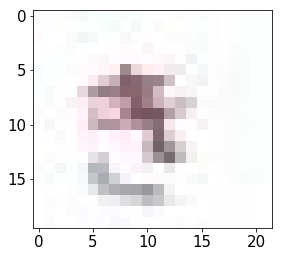

よ
['IMG_2312 (36).jpg']
img/cliped_img2/よ/IMG_2312 (36).jpg


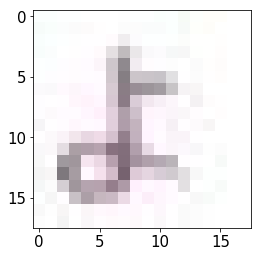

む
['IMG_2312 (31).jpg']
img/cliped_img2/む/IMG_2312 (31).jpg


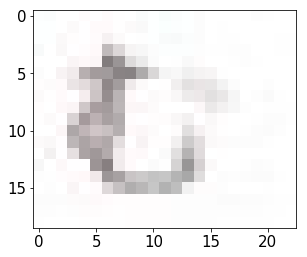

い
['IMG_2312 (1).jpg']
img/cliped_img2/い/IMG_2312 (1).jpg


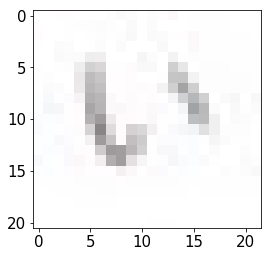

た
['IMG_2312 (14).jpg']
img/cliped_img2/た/IMG_2312 (14).jpg


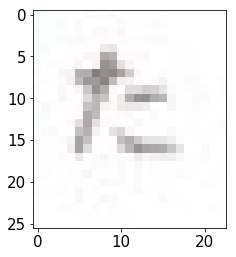

こ
['IMG_2312 (7).jpg']
img/cliped_img2/こ/IMG_2312 (7).jpg


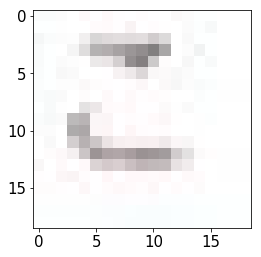

な
['IMG_2312 (19).jpg']
img/cliped_img2/な/IMG_2312 (19).jpg


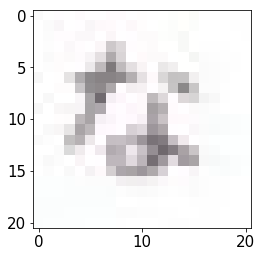

さ
['IMG_2312 (8).jpg']
img/cliped_img2/さ/IMG_2312 (8).jpg


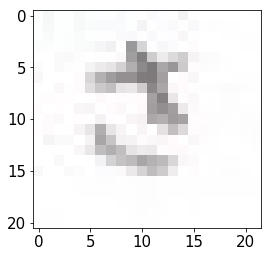

や
['IMG_2312 (34).jpg']
img/cliped_img2/や/IMG_2312 (34).jpg


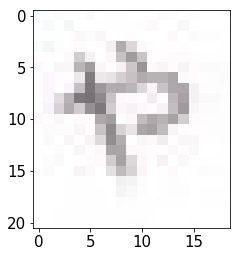

く
['IMG_2312 (5).jpg']
img/cliped_img2/く/IMG_2312 (5).jpg


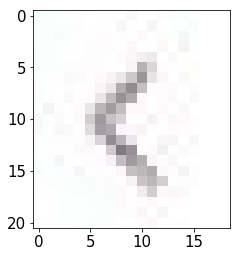

わ
['IMG_2312 (42).jpg']
img/cliped_img2/わ/IMG_2312 (42).jpg


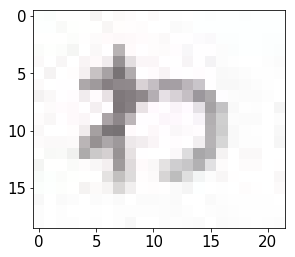

せ
['IMG_2312 (12).jpg']
img/cliped_img2/せ/IMG_2312 (12).jpg


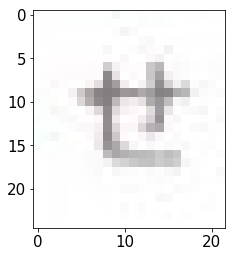

す
['IMG_2312 (10).jpg']
img/cliped_img2/す/IMG_2312 (10).jpg


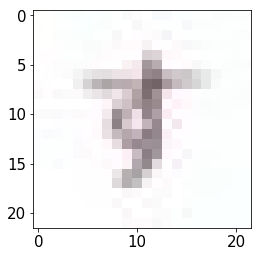

う
['IMG_2312 (1).jpg']
img/cliped_img2/う/IMG_2312 (1).jpg


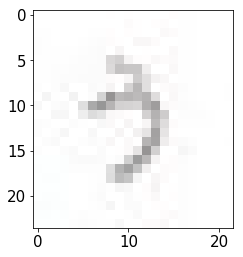

ほ
['IMG_2312 (28).jpg']
img/cliped_img2/ほ/IMG_2312 (28).jpg


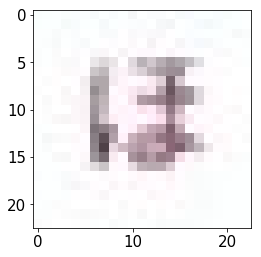

ゆ
['IMG_2312 (35).jpg']
img/cliped_img2/ゆ/IMG_2312 (35).jpg


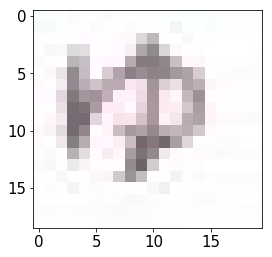

あ
['IMG_2312 (1).jpg']
img/cliped_img2/あ/IMG_2312 (1).jpg


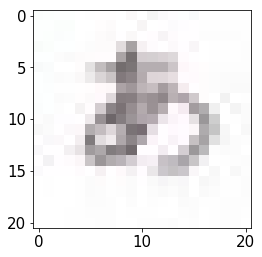

ろ
['IMG_2312 (41).jpg']
img/cliped_img2/ろ/IMG_2312 (41).jpg


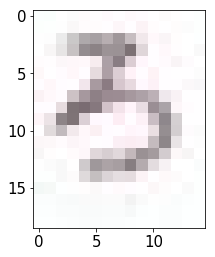

は
['IMG_2312 (24).jpg']
img/cliped_img2/は/IMG_2312 (24).jpg


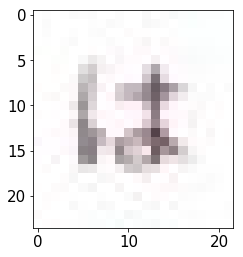

け
['IMG_2312 (6).jpg']
img/cliped_img2/け/IMG_2312 (6).jpg


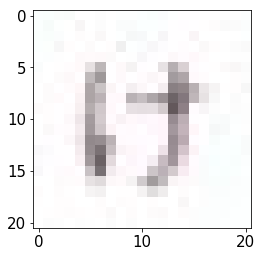

ひ
['IMG_2312 (25).jpg']
img/cliped_img2/ひ/IMG_2312 (25).jpg


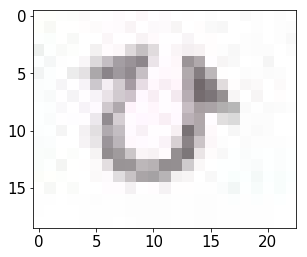

ぬ
['IMG_2312 (21).jpg']
img/cliped_img2/ぬ/IMG_2312 (21).jpg


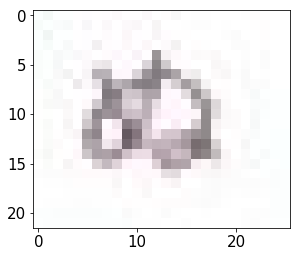

ふ
['IMG_2312 (26).jpg']
img/cliped_img2/ふ/IMG_2312 (26).jpg


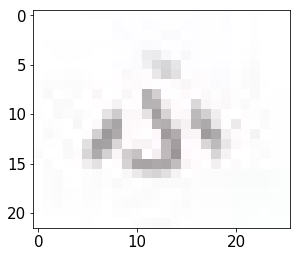

め
['IMG_2312 (32).jpg']
img/cliped_img2/め/IMG_2312 (32).jpg


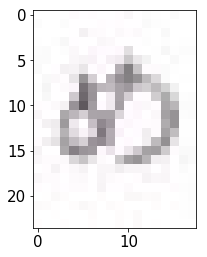

る
['IMG_2312 (39).jpg']
img/cliped_img2/る/IMG_2312 (39).jpg


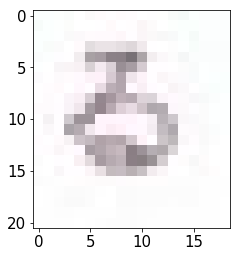

え
['IMG_2312 (1).jpg']
img/cliped_img2/え/IMG_2312 (1).jpg


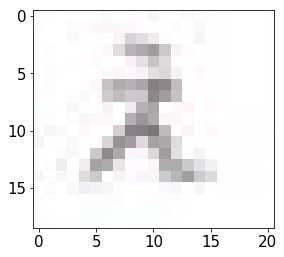

み
['IMG_2312 (30).jpg']
img/cliped_img2/み/IMG_2312 (30).jpg


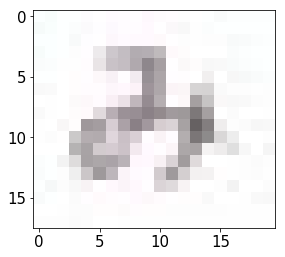

ち
['IMG_2312 (15).jpg']
img/cliped_img2/ち/IMG_2312 (15).jpg


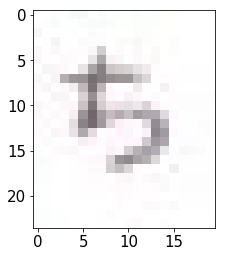

を
['IMG_2312 (43).jpg']
img/cliped_img2/を/IMG_2312 (43).jpg


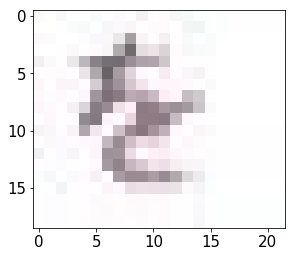

れ
['IMG_2312 (40).jpg']
img/cliped_img2/れ/IMG_2312 (40).jpg


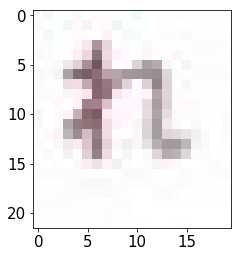

そ
['IMG_2312 (13).jpg']
img/cliped_img2/そ/IMG_2312 (13).jpg


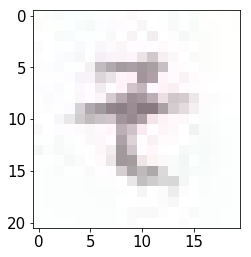

お
['IMG_2312 (2).jpg']
img/cliped_img2/お/IMG_2312 (2).jpg


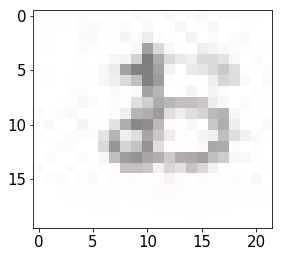

か
['IMG_2312 (3).jpg']
img/cliped_img2/か/IMG_2312 (3).jpg


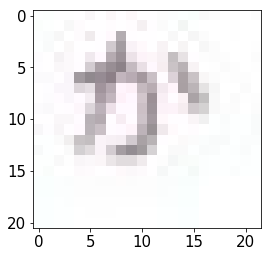

の
['IMG_2312 (23).jpg']
img/cliped_img2/の/IMG_2312 (23).jpg


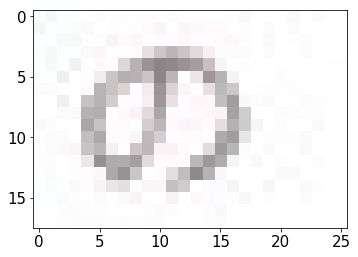

も
['IMG_2312 (33).jpg']
img/cliped_img2/も/IMG_2312 (33).jpg


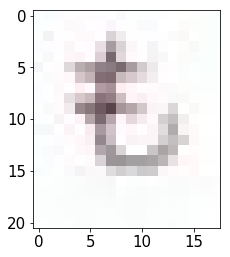

ね
['IMG_2312 (22).jpg']
img/cliped_img2/ね/IMG_2312 (22).jpg


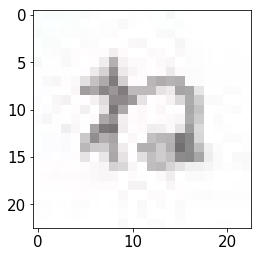

ら
['IMG_2312 (37).jpg']
img/cliped_img2/ら/IMG_2312 (37).jpg


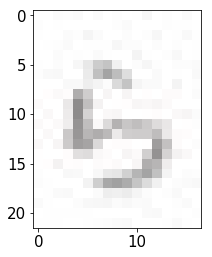

し
['IMG_2312 (9).jpg']
img/cliped_img2/し/IMG_2312 (9).jpg


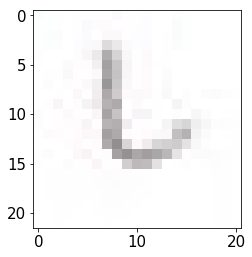

り
['IMG_2312 (38).jpg']
img/cliped_img2/り/IMG_2312 (38).jpg


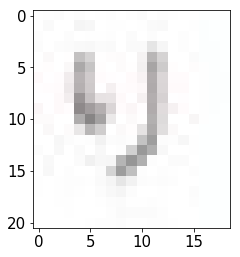

に
['IMG_2312 (20).jpg']
img/cliped_img2/に/IMG_2312 (20).jpg


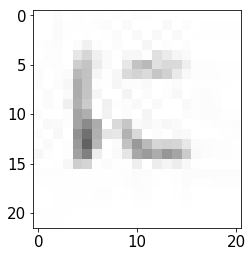

と
['IMG_2312 (18).jpg']
img/cliped_img2/と/IMG_2312 (18).jpg


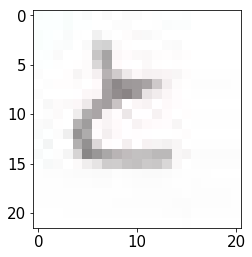

ん
['IMG_2312 (44).jpg']
img/cliped_img2/ん/IMG_2312 (44).jpg


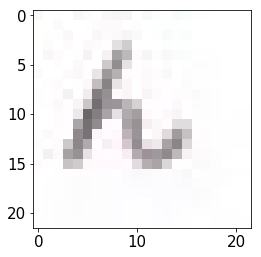

In [2]:
path= 'img/font_hiragana/'
hiragana_lis=os.listdir(path)

N=1
Dir= "img/cliped_img2/"
#plt.figure(figsize=(100,100))
for i in hiragana_lis:
    print(i)
    Dir=Dir+i
    cliped_lis= os.listdir(Dir)
    print(cliped_lis)
    for n in cliped_lis:
        print(Dir+"/"+n)
        
        processed_img= cv2.imread(Dir+"/"+n)
        
        #plt.subplot(46,2,N)
        plt.rcParams["font.size"] = 15
        plt.imshow(processed_img)
        plt.show()
        
    Dir= "img/cliped_img2/"
#plt.show()